<a href="https://colab.research.google.com/github/Yeoonsu/PythonPractice/blob/main/pytorch_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 손글씨 데이터 MNIST 이용해 multi layer perceptron(MLP) 설계하기
# 1. Module Import
import numpy as np #(1)
import matplotlib.pyplot as plt #(2)
import torch #(3)
import torch.nn as nn #(4) 파이토치 모듈 중 인공신경망 모델 설계할 때 필요한 함수
import torch.nn.functional as F #(5) torch nn 모듈 중에서도 자주 이용되는 함수
from torchvision import transforms, datasets #(6) cv 분야 torchvision 모듈 내 transforms, datasets 함수 임포트

In [ ]:
# 2. 딥러닝 모델 설계 시 활용하는 장비 확인
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.11.0+cu113  Device: cpu


In [ ]:
# 파이썬 코드 내 하이퍼파라미터를 지정할 때 보통 영어 대문자로 표기
BATCH_SIZE = 32 #(1) 미니배치 1개당 데이터가 32개
EPOCHS = 10 #(2) 전체 데이터를 이용해 학습을 진행한 횟수

In [ ]:
# 3. MNIST 데이터 다운로드 (Train set, Test set 분리하기)
train_dataset = datasets.MNIST(root = "../data/MNIST", #(1) root : 데이터가 저장될 장소 지정
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = "../data/MNIST",
                             train = False,
                             transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = BATCH_SIZE,
                                         shuffle = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [ ]:
# 4. 데이터 확인하기 (1) 
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('Y_train:', y_train.size(), 'type:', y_train.type())
    break
# X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
# y_train: torch.Size([32]) type: torch.LongTensor

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
Y_train: torch.Size([32]) type: torch.LongTensor


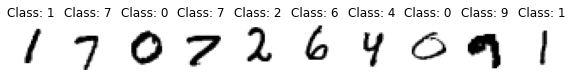

In [ ]:
# 5. 데이터 확인하기 (2)
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap="gray_r")
    plt.title('Class: ' + str(y_train[i].item()))
    # 커널 자꾸 died

In [ ]:
# # 6. MLP (Multi Layer Perceptron) 모델 설계하기
# class Net(nn.Module):
#   def __init__(self):
#     super(Net, self).__init__()
#     self.fc1 = nn.Linear(28 * 28, 512)
#     self.fc2 = nn.Linear(512, 256)
#     self.fc3 = nn.Linear(256, 10)
#   def forward(self, x):
#     x = x.view(-1, 28*28)
#     x = self.fc1(x)
#     x = F.sigmoid(x)
#     x = self.fc2(x)
#     x = F.sigmoid(x)
#     x = self.fc3(x)
#     x = F.log_softmax(x, dim = 1)
#     return x

In [ ]:
# # 6. "Dropout 적용해서" Multi Layer Perceptron(MLP) 모델 설계하기
# class Net(nn.Module):
#   def __init__(self):
#     super(Net, self).__init__()
#     self.fc1 = nn.Linear(28 * 28, 512)
#     self.fc2 = nn.Linear(512, 256)
#     self.fc3 = nn.Linear(256, 10)
#     self.dropout_prob = 0.5
#   def forward(self, x):
#     x = x.view(-1, 28*28)
#     x = self.fc1(x)
#     x = F.sigmoid(x)
#     x = F.dropout(x, training = self.training, p = self.dropout_prob)
#     x = self.fc2(x)
#     x = F.sigmoid(x)
#     x = F.dropout(x, training = self.training, p = self.dropout_prob)
#     x = self.fc3(x)
#     x = F.log_softmax(x, dim=1)
# return x

In [ ]:
# # 6. MLP 모델 sigmoid 대신 relu 함수 쓰기
# class Net(nn.Module):
#   def __init__(self):
#     super(Net, self).__init__()
#     self.fc1 = nn.Linear(28 * 28, 512)
#     self.fc2 = nn.Linear(512, 256)
#     self.fc3 = nn.Linear(256, 10)
#     self.dropout_prob = 0.5

#   def forward(self, x):
#     x = x.view(-1, 28*28)
#     x = self.fc1(x)
#     x = F.relu(x)
#     x = F.dropout(x, training = self.training, p = self.dropout_prob)
#     x = self.fc2(x)
#     x = F.relu(x)
#     x = F.dropout(x, training = self.training, p = self.dropout_prob)
#     x = self.fc3(x)
#     x = F.log_softmax(x, dim = 1)
#     return x


In [ ]:
# 6. Batch Normalization을 Activation 함수 이전에 적용하기
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
    self.dropout_prob = 0.5
    self.batch_norm1 = nn.BatchNorm1d(512)
    self.batch_norm2 = nn.BatchNorm1d(256)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = self.batch_norm1(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc2(x)
    x = self.batch_norm2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x


모든 데이터를 한번에 Feed Forward(Input에서 Weight와 Hidden을 거쳐 Output을 내보내는 과정)하면 컴퓨팅 문제로 너무 많은 연산을 필요로 함(비효율).
1,000개 데이터 중 100개씩 쪼개 Feed Forwad, Back Propagation하면 10번 반복하게 되는데 이 한 과정을 Epoch
100개 데이터 = Mini-Batch
100의 크기 = Batch Size 

In [ ]:
# # 7. (기본) Optimizer, Objective Function 설정하기
# model = Net().to(DEVICE)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
# criterion = nn.CrossEntropyLoss()

# print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [1]:
#. (He Inetialization 이용하여 파라미터 초기화) Optimizer, Objective Function 설정하기
# import torch.nn.init as init
# def weight_init(m):
#   if isinstance(m, nn.Linear):
#     init.kaiming_uniform_(m.weight.data)

# model = Net().to(DEVICE)
# model.apply(weight_init)
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.5)
# criterion = nn.CrossEntropyLoss()

KeyboardInterrupt: ignored

In [ ]:
# 7번 Adam optimizer로 변경
import torch.nn.init as init
def weight_init(m):
   if isinstance(m, nn.Linear):
     init.kaiming_uniform_(m.weight.data)

model = Net().to(DEVICE)
model.apply(weight_init)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
# 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
          Epoch, batch_idx * len(image),
          len(train_loader.dataset), 100. * batch_idx / len(train_loader),
          loss.item()
      ))

In [ ]:
# 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output = model(image)
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy

In [ ]:
# 10. MLT 학습을 실행하면서 Train, Test set의 Loss 및 Test set Accuracy를 확인하기
for Epoch in range(1, EPOCHS + 1):
  train(model, train_loader, optimizer, log_interval = 200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
        format(Epoch, test_loss, test_accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.332725
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.326303
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.300049
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.276183
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.245530
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.252391
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.284619
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.260747
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.333320
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.231529

[EPOCH: 1], 	Test Loss: 0.0697, 	Test Accuracy: 15.48 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.251117
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.202127
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.188488
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.087750
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 1.991727
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 1.833537
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 1.508980
Train Epoch: 2 [448